# Current Functions of Small Mean-Reverting Portfolio

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from arbitragelab.cointegration_approach.small_mean_rev_portfolio import SmallMeanRevPortfolio

%matplotlib inline

I will use two datasets to showcase the current functions.

1. US Swap rate data. Tenors: 1-20 Year, 25 Year, 30 Year. Starting from 2004 to date.
2. Spot forex data. All USD pairs. Including G10 and a selection of EM currencies. Starting from 2000 to date.

## Load Data

### Forex spot data

In [2]:
USD_df = pd.read_csv("USD.csv", parse_dates=["Dates"])
USD_df.set_index("Dates", inplace=True)
USD_df = USD_df.iloc[:, 2:]
USD_df.fillna(method='ffill', inplace=True)
USD_df.columns = [x.split()[0] for x in USD_df.columns]
print(*USD_df.columns, sep='\n')

EUR
JPY
GBP
CHF
AUD
CAD
NZD
SEK
NOK
BRL
CLP
MXN
CNH
INR
THB
IDR
KRW
SGD
TRY
CZK
HUF
PLN
RON
RUB
ILS
ZAR


### US swap data

In [3]:
us_swap_df = pd.read_csv("US_Swap.csv")
us_swap_df['Dates'] = pd.to_datetime(us_swap_df['Dates'])
us_swap_df.set_index('Dates', inplace=True)
us_swap_df.fillna(method="ffill", inplace=True)

### Select a time period of data to test

For consistency, I'll choose the data from 2015-2019 to test the function of the module.

In [4]:
USD_test = USD_df.loc['2015-01-01':'2019-12-31']
us_swap_test = us_swap_df.loc['2015-01-01':'2019-12-31']

## Box-Tiao Decomposition

In [5]:
us_swap_test_portf = SmallMeanRevPortfolio(us_swap_test)
USD_test_portf = SmallMeanRevPortfolio(USD_test)

Calculate the weights in the descending order of variance ratio. The larger the variance ratio, the more momentum-like the portfolio will be.

In [6]:
us_swap_box_tiao_weights = us_swap_test_portf.box_tiao()

C:\Anaconda3\envs\arbitragelab\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)


In [7]:
USD_box_tiao_weights = USD_test_portf.box_tiao()

C:\Anaconda3\envs\arbitragelab\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)


Check the mean reversion coefficient $\lambda$ and the half-life. All of these are based on Ornstein-Uhlenbeck process.

### US swaps

In [8]:
for i in range(us_swap_box_tiao_weights.shape[1]):
    coeff, hl = us_swap_test_portf.mean_rev_coeff(us_swap_box_tiao_weights[:,i], us_swap_test, interval='D')
    print("Mean-rev Coefficient: {}; half-life: {}".format(coeff, hl*252))

Mean-rev Coefficient: 0.21554977959120306; half-life: 810.360789198575
Mean-rev Coefficient: 0.9342925517280565; half-life: 186.95759607419853
Mean-rev Coefficient: 2.9993220601405226; half-life: 58.2375236799087
Mean-rev Coefficient: 1e-05; half-life: 17467308.95011062
Mean-rev Coefficient: 132.67492638656645; half-life: 1.3165493605941214
Mean-rev Coefficient: 19.046821842585093; half-life: 9.170721023418732
Mean-rev Coefficient: 132.74312446603022; half-life: 1.315872970473933
Mean-rev Coefficient: 132.92945231454124; half-life: 1.3140285050433373
Mean-rev Coefficient: 132.73360824363942; half-life: 1.315967310859844
Mean-rev Coefficient: 132.7167317369071; half-life: 1.3161346517134846
Mean-rev Coefficient: 132.90317121499385; half-life: 1.3142883492113389
Mean-rev Coefficient: 132.72205953886063; half-life: 1.3160818187120011
Mean-rev Coefficient: 132.73886426807945; half-life: 1.3159152028627907
Mean-rev Coefficient: 132.72814643051848; half-life: 1.316021463409386
Mean-rev Coeff

The first portfolio should be a trending portfolio. And the consequent ones will be more and more mean-reverting. Let's check.

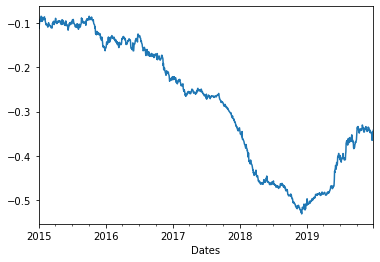

In [9]:
swap_mom_portf1 = us_swap_test @ us_swap_box_tiao_weights[:, 0]
swap_mom_portf1.plot()

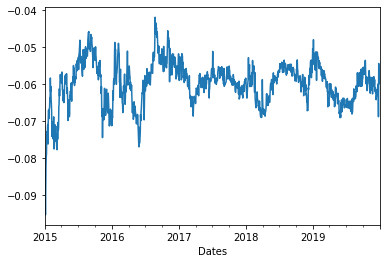

In [10]:
swap_mr_portf2 = us_swap_test @ us_swap_box_tiao_weights[:, 5]
swap_mr_portf2.plot()

Looks like it has done what it should be doing. The portfolio with smaller variance ratio for US swap rate are very similar, and therefore yielding almost the same mean reversion coefficient.

### Forex

In [11]:
for i in range(USD_box_tiao_weights.shape[1]):
    coeff, hl = USD_test_portf.mean_rev_coeff(USD_box_tiao_weights[:,i], USD_test, interval='D')
    print("Mean-rev Coefficient: {}; half-life: {}".format(coeff, hl*252))

Mean-rev Coefficient: 0.0020997104513273517; half-life: 83189.13181133378
Mean-rev Coefficient: 0.29680089852412495; half-life: 588.5194093740528
Mean-rev Coefficient: 1e-05; half-life: 17467308.95011062
Mean-rev Coefficient: 0.8729304419438487; half-life: 200.09966557260017
Mean-rev Coefficient: 1.1136960614518303; half-life: 156.8408972133742
Mean-rev Coefficient: 1.5767050499958162; half-life: 110.78361771059826
Mean-rev Coefficient: 2.7808929201668655; half-life: 62.811871767656946
Mean-rev Coefficient: 3.0478096478946073; half-life: 57.31102322015695
Mean-rev Coefficient: 4.475751272045204; half-life: 39.026540771397464
Mean-rev Coefficient: 5.058042156563351; half-life: 34.53373540480464
Mean-rev Coefficient: 5.77012297006432; half-life: 30.271987340186463
Mean-rev Coefficient: 7.000559007517818; half-life: 24.951305933358583
Mean-rev Coefficient: 9.25579571131584; half-life: 18.871752893979334
Mean-rev Coefficient: 11.57305595777714; half-life: 15.093082599650371
Mean-rev Coeffi

The Forex data looks more regular. Let's check the first portfolio to see if it is a trending one.

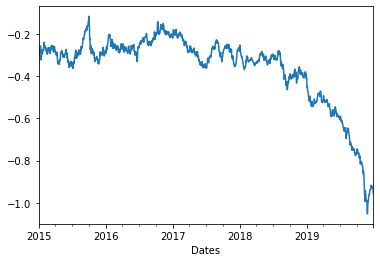

In [12]:
USD_mom_portf1 = USD_test @ USD_box_tiao_weights[:,0]
USD_mom_portf1.plot()

And the last portfolio should be a mean reverting one.

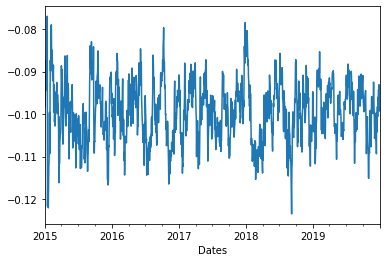

In [13]:
USD_mr_portf1 = USD_test @ USD_box_tiao_weights[:, -1]
USD_mr_portf1.plot()

Looks like the portfolio is nicely oscillating around the mean -0.10.

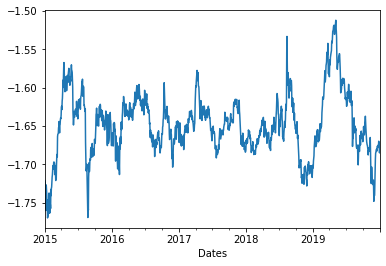

In [14]:
USD_mr_portf2 = USD_test @ USD_box_tiao_weights[:, 10]
USD_mr_portf2.plot()

Above is a mean-reversion portfolio with a longer half-life.

## Covariance Selection & VAR(1) Sparse Estimate

We cannot directly apply the greedy search/semidefinite relaxation on all assets in the investing universe. In fact, greedy search should be fine, but semidefinite relaxation will suffer due to numerical instability.

So first step is to narrow down the investing universe, and in the meantime, discover possible structures in between the assets.

### Graphical Lasso for Covariance Selection

Firstly, we do a sparse estimation on the covariance matrix. Its inverse can be used as a graph representation that describes an underlying structure/connection between the assets.

First let's look at US Swap. We'll try to break down the covariance graph into 3 clusters.

The regularization parameter for graphical Lasso is quite finicky, so make sure you tune the regularization parameter with a small step size.

In [15]:
best_swap_graph_lasso_alpha = us_swap_test_portf.covar_sparse_tuning(alpha_min=0.95, alpha_max=0.99, 
                                                                     n_alphas=400, max_iter=100, clusters=3)

In [16]:
best_swap_graph_lasso_alpha

0.9881954887218045

Now fit the graphical Lasso model with the optimized regularization parameter.

In [17]:
swap_cov, swap_prec = us_swap_test_portf.covar_sparse_fit(alpha=best_swap_graph_lasso_alpha, max_iter=1000)

The inverse of the covariance matrix, i.e., the precision matrix, is the basis of the graph representation.

Plot the graph. I haven't implemented this into the module yet but the code will be very similar.

The graph will usually remain chordal. In order to ensure a feasible solution, I didn't force the chordal graph requirement.

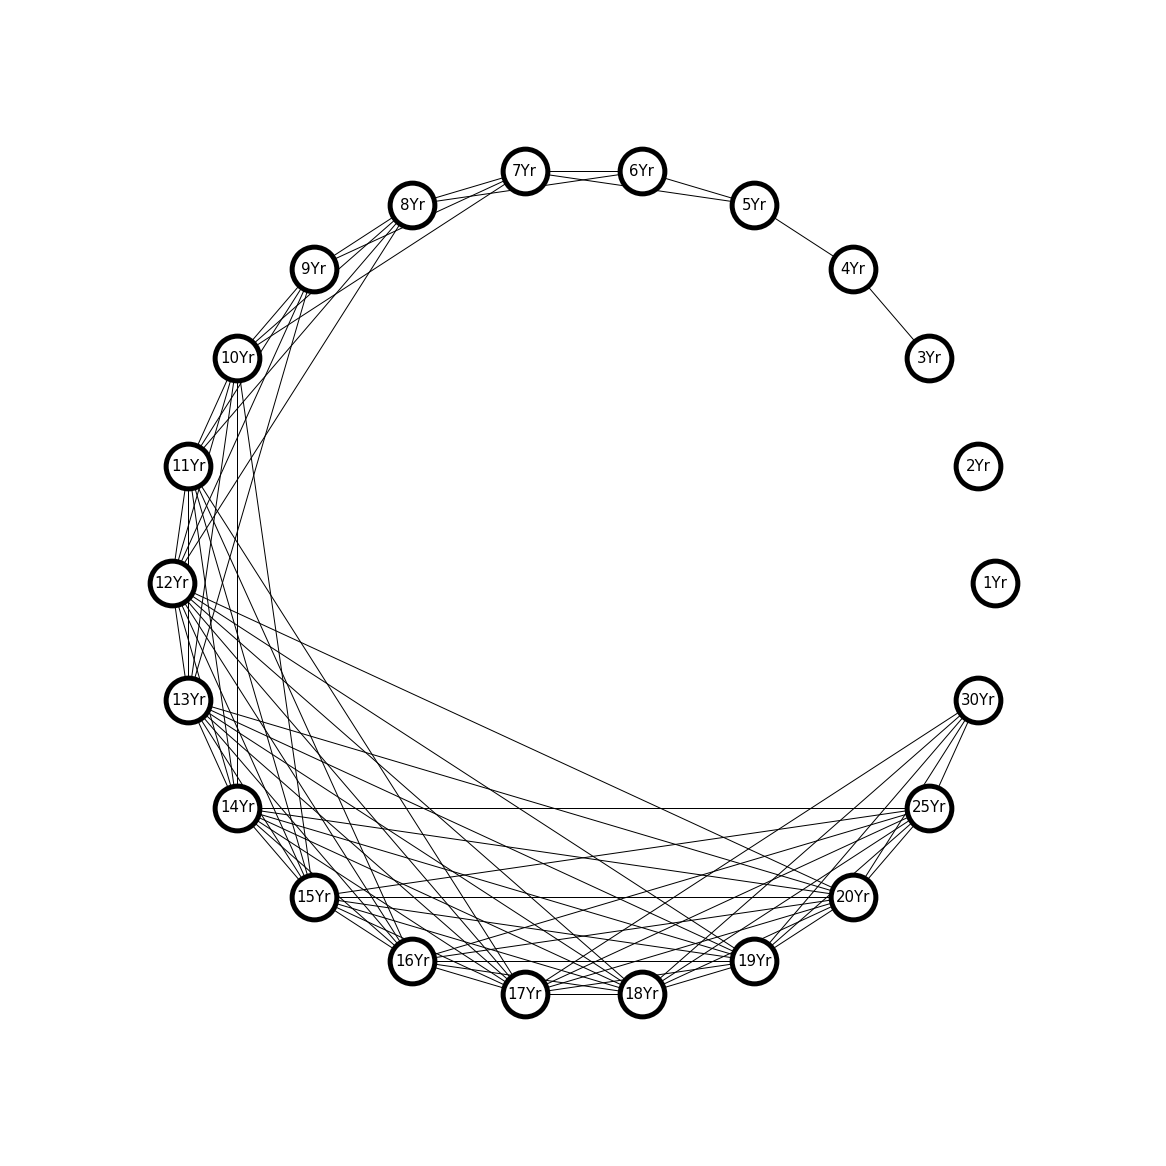

True


In [18]:
gamma_G = np.around(swap_prec, 12)
np.fill_diagonal(gamma_G, 0)

H = nx.from_numpy_array(gamma_G)

mapping = {x: y.split()[0] for x, y in enumerate(list(us_swap_test.columns))}
H = nx.relabel_nodes(H, mapping)
options = {
    "font_size": 15,
    "node_size": 2000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 1,
    "with_labels": True
    
}

# print(nx.number_connected_components(H))
# # largest_components=sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[:n]
# for component in [H.subgraph(c).copy() for c in nx.connected_components(H)]:
plt.figure(figsize=(16,16)) 
nx.draw(H, pos=nx.circular_layout(H), **options)
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

print(nx.is_chordal(H))

### VAR(1) Sparse Estimation

Now we need to do the sparse VAR(1) matrix estimation. I have allowed users to use either a column-wise LASSO or a multi-task LASSO. Experiment have shown that multi-task LASSO works better for both dataset and it will be the recommended option for users.

Here, we order the algorithm to set half of the VAR(1) matrix elements to 0. This is the first parameter, sparsity, i.e., the percentage of matrix elements to be set as 0.

In [19]:
best_VAR_LASSO_alpha = us_swap_test_portf.LASSO_VAR_tuning(0.5, multi_task_lasso=True, max_iter=2500, 
                                                   alpha_max=0.2, alpha_min=0.001, n_alphas=400)

In [20]:
best_VAR_LASSO_alpha

0.012471177944862157

In [21]:
A_hat = us_swap_test_portf.LASSO_VAR_fit(best_VAR_LASSO_alpha, max_iter=5000, multi_task_lasso=True)

We calculate the $A^T A$ matrix as the graph representation of the VAR(1) sparse estimation. 

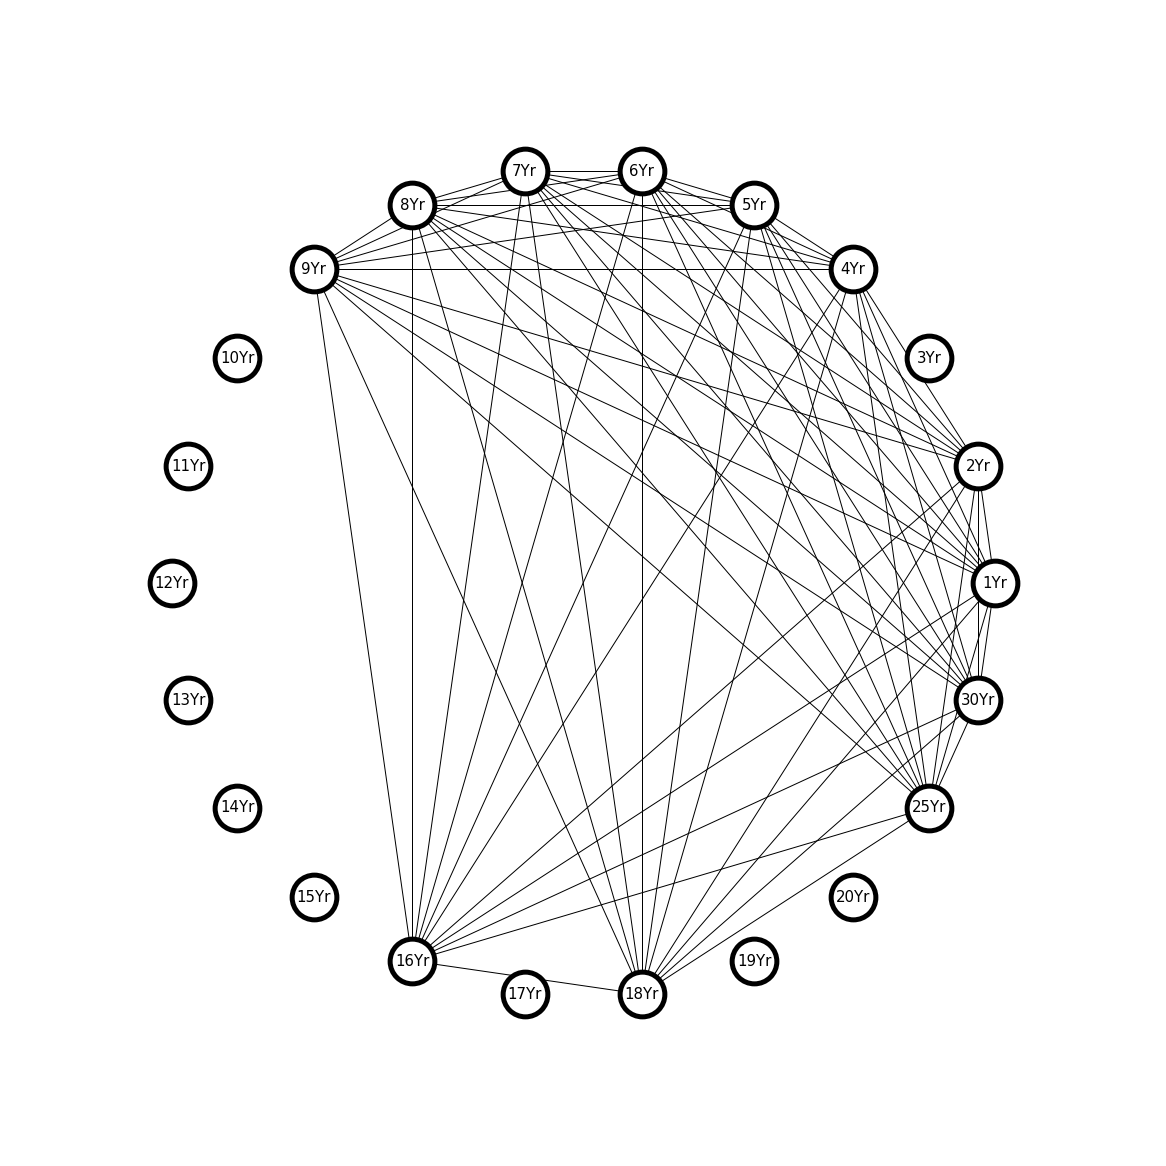

{'6Yr', '2Yr', '7Yr', '1Yr', '16Yr', '18Yr', '4Yr', '30Yr', '5Yr', '9Yr', '25Yr', '8Yr'}


In [22]:
adj_matrix = pd.DataFrame(A_hat.T @ A_hat).to_numpy()
np.fill_diagonal(adj_matrix, 0)
G = nx.from_numpy_array(adj_matrix)
mapping = {x: y.split()[0] for x, y in enumerate(list(us_swap_test.columns))}
G = nx.relabel_nodes(G, mapping)
options = {
    "font_size": 15,
    "node_size": 2000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 1,
    "with_labels": True
    
}
plt.figure(figsize=(16,16))
nx.draw(G, pos=nx.circular_layout(G), **options)
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()
print(max(nx.connected_components(G), key=len))

Finally, extract the intersection of the covariance graph and the VAR(1) estimate graph and use the result as the final clusters for greedy selection/semidefinite relaxation.

In [23]:
us_swap_selected_assets = us_swap_test_portf.find_clusters(swap_prec, A_hat.T @ A_hat)

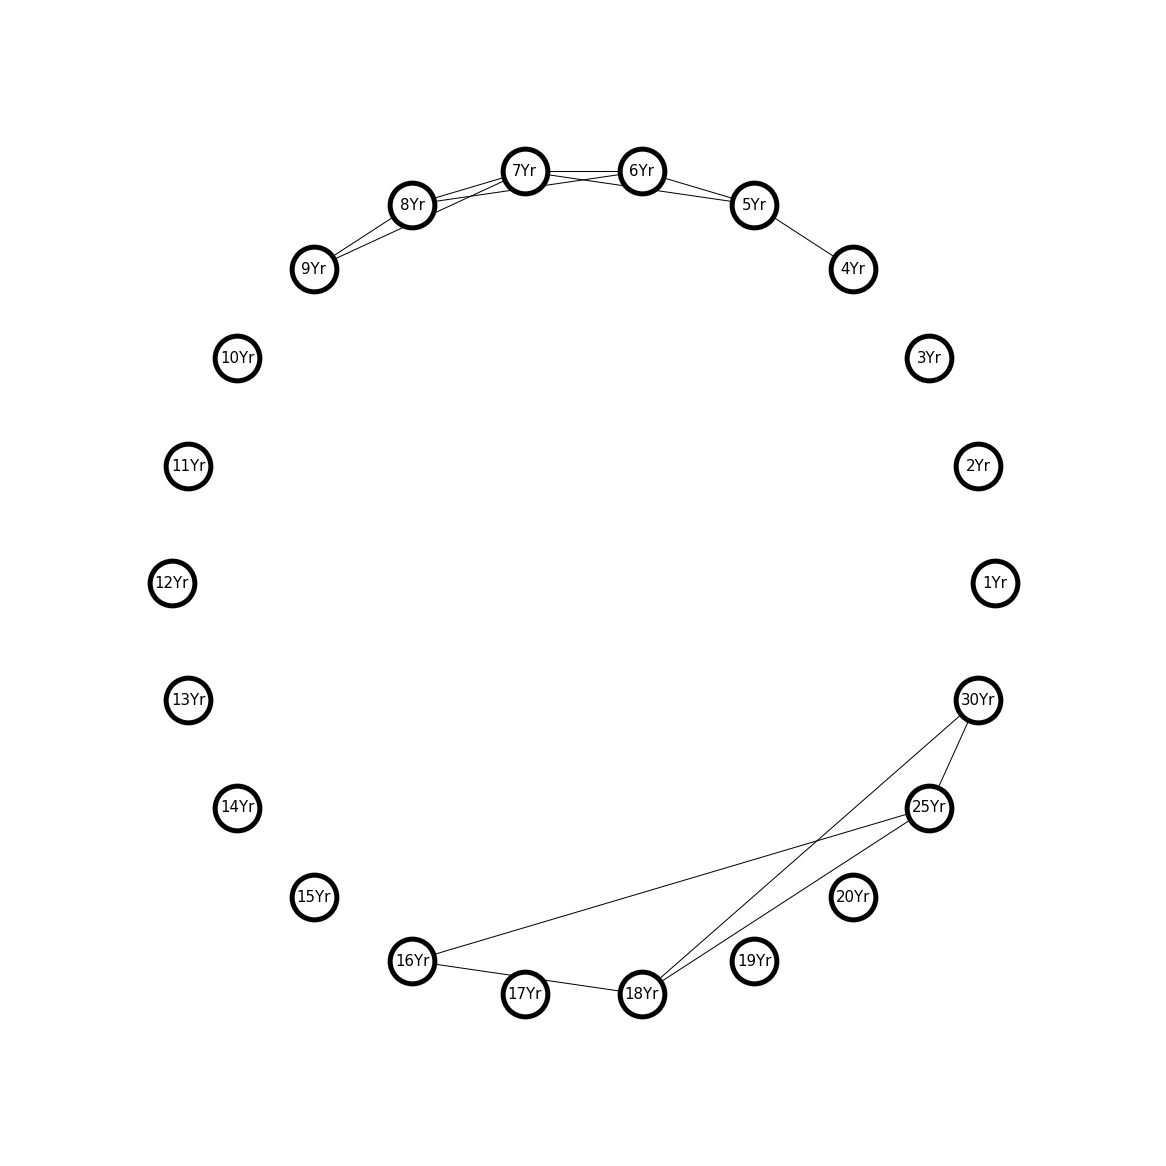

In [24]:
options = {
    "font_size": 15,
    "node_size": 2000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 1,
    "with_labels": True
    
}
plt.figure(figsize=(16,16))
nx.draw(us_swap_selected_assets, pos=nx.circular_layout(us_swap_selected_assets), **options)
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

swap_universe = []
for comp in nx.connected_components(us_swap_selected_assets):
    if len(comp) > 1:
        swap_universe.append(comp)

These two clusters defined a much smaller investing universe to which we can apply greedy search/SDP.

Now I'll do the same for forex data.

In [25]:
best_USD_graph_lasso_alpha = USD_test_portf.covar_sparse_tuning(alpha_min=0.1, alpha_max=1, 
                                                                     n_alphas=400, max_iter=100, clusters=3)

C:\Anaconda3\envs\arbitragelab\lib\site-packages\sklearn\covariance\_graph_lasso.py:266: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 1.634e-03
  % (max_iter, d_gap), ConvergenceWarning)
C:\Anaconda3\envs\arbitragelab\lib\site-packages\sklearn\covariance\_graph_lasso.py:266: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -6.760e-04
  % (max_iter, d_gap), ConvergenceWarning)
C:\Anaconda3\envs\arbitragelab\lib\site-packages\sklearn\covariance\_graph_lasso.py:266: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -1.821e-04
  % (max_iter, d_gap), ConvergenceWarning)
C:\Anaconda3\envs\arbitragelab\lib\site-packages\sklearn\covariance\_graph_lasso.py:266: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -5.904e-04
  % (max_iter, d_gap), ConvergenceWarning)
C:\Anaconda3\envs\arbitragelab\lib\site-packages\sklearn\covariance\_graph_lasso.py:266: 

In [26]:
best_USD_graph_lasso_alpha

0.6864661654135339

In [27]:
USD_cov, USD_prec = USD_test_portf.covar_sparse_fit(alpha=best_USD_graph_lasso_alpha, max_iter=100)

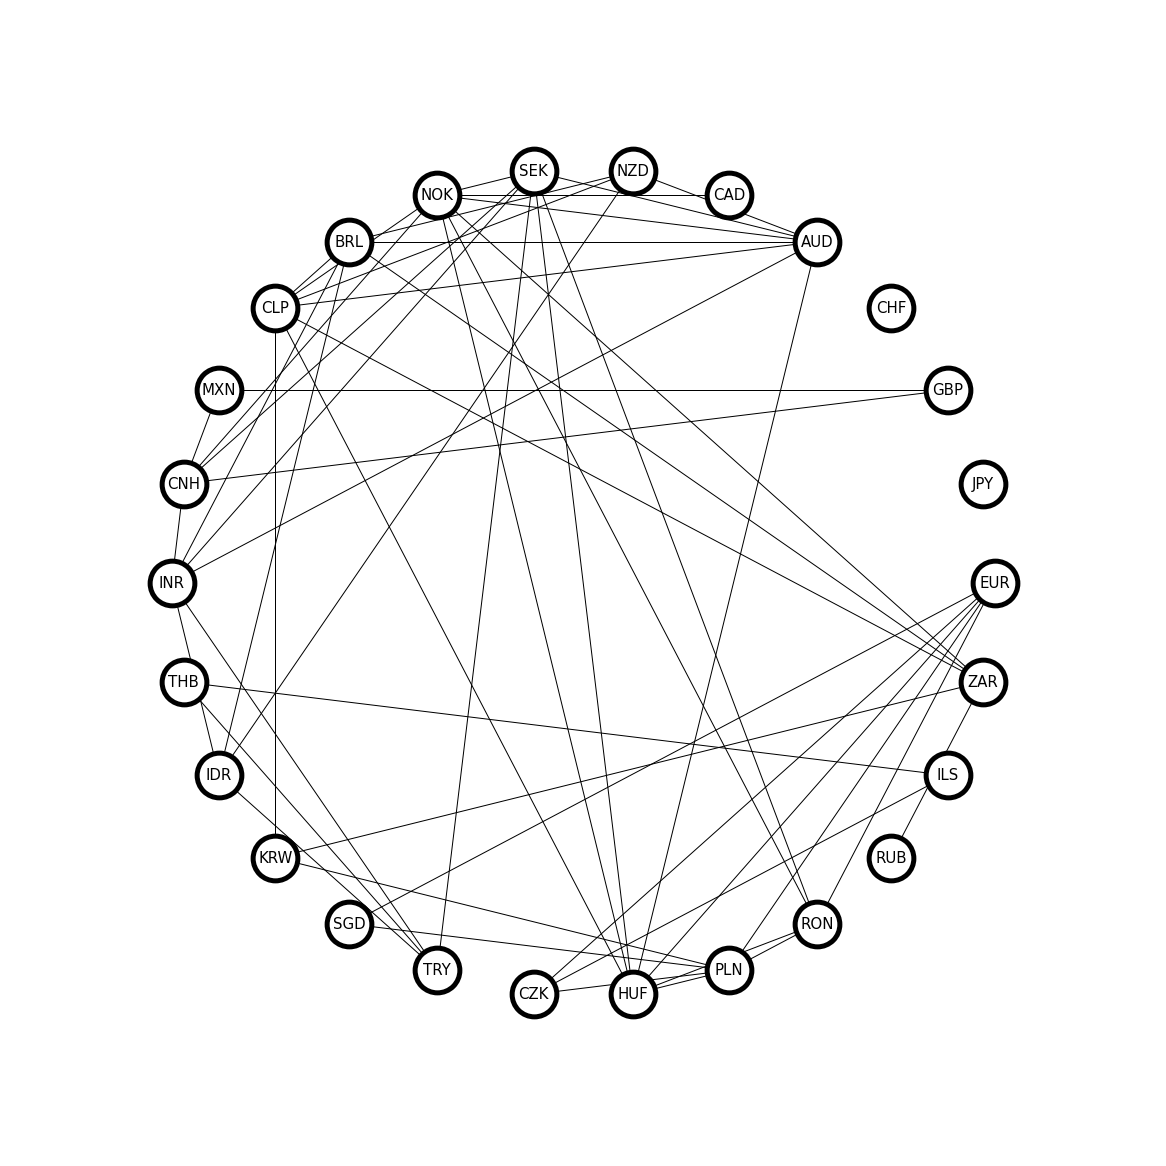

False


In [28]:
gamma_G = np.around(USD_prec, 12)
np.fill_diagonal(gamma_G, 0)

H = nx.from_numpy_array(gamma_G)

mapping = {x: y.split()[0] for x, y in enumerate(list(USD_test.columns))}
H = nx.relabel_nodes(H, mapping)
options = {
    "font_size": 15,
    "node_size": 2000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 1,
    "with_labels": True
    
}

# print(nx.number_connected_components(H))
# # largest_components=sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[:n]
# for component in [H.subgraph(c).copy() for c in nx.connected_components(H)]:
plt.figure(figsize=(16,16)) 
nx.draw(H, pos=nx.circular_layout(H), **options)
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

print(nx.is_chordal(H))

Oops. This one is not exactly a chordal graph. Will consider if I need to force it or still give the solution to users for them to decide.

However, the graph makes some sense. JPY and CHF are two safe-haven currencies that usually have their own behaviors. Especially JPY.

In [29]:
best_VAR_LASSO_alpha = USD_test_portf.LASSO_VAR_tuning(0.5, multi_task_lasso=True, max_iter=2500, 
                                                   alpha_max=1.5, alpha_min=0.8, n_alphas=400)

In [30]:
best_VAR_LASSO_alpha

1.2771929824561403

In [31]:
A_hat = USD_test_portf.LASSO_VAR_fit(best_VAR_LASSO_alpha, max_iter=5000, multi_task_lasso=True)

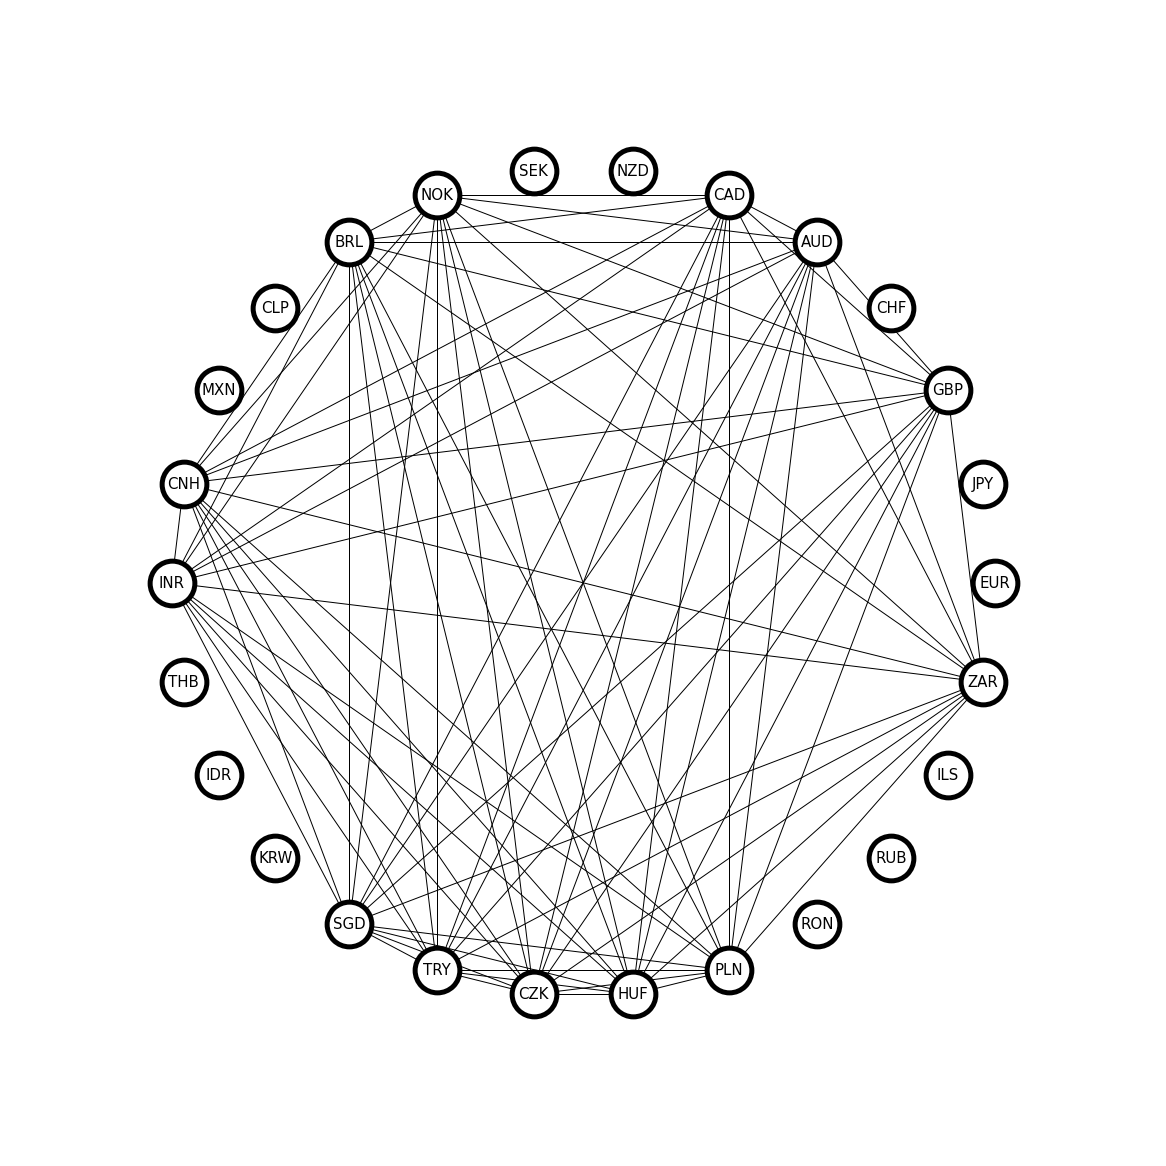

{'NOK', 'AUD', 'TRY', 'CNH', 'CZK', 'GBP', 'SGD', 'ZAR', 'CAD', 'BRL', 'INR', 'HUF', 'PLN'}


In [32]:
adj_matrix = pd.DataFrame(A_hat.T @ A_hat).to_numpy()
np.fill_diagonal(adj_matrix, 0)
G = nx.from_numpy_array(adj_matrix)
mapping = {x: y.split()[0] for x, y in enumerate(list(USD_test.columns))}
G = nx.relabel_nodes(G, mapping)
options = {
    "font_size": 15,
    "node_size": 2000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 1,
    "with_labels": True
    
}
plt.figure(figsize=(16,16))
nx.draw(G, pos=nx.circular_layout(G), **options)
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()
print(max(nx.connected_components(G), key=len))

In [33]:
USD_selected_assets = USD_test_portf.find_clusters(USD_prec, A_hat.T @ A_hat)

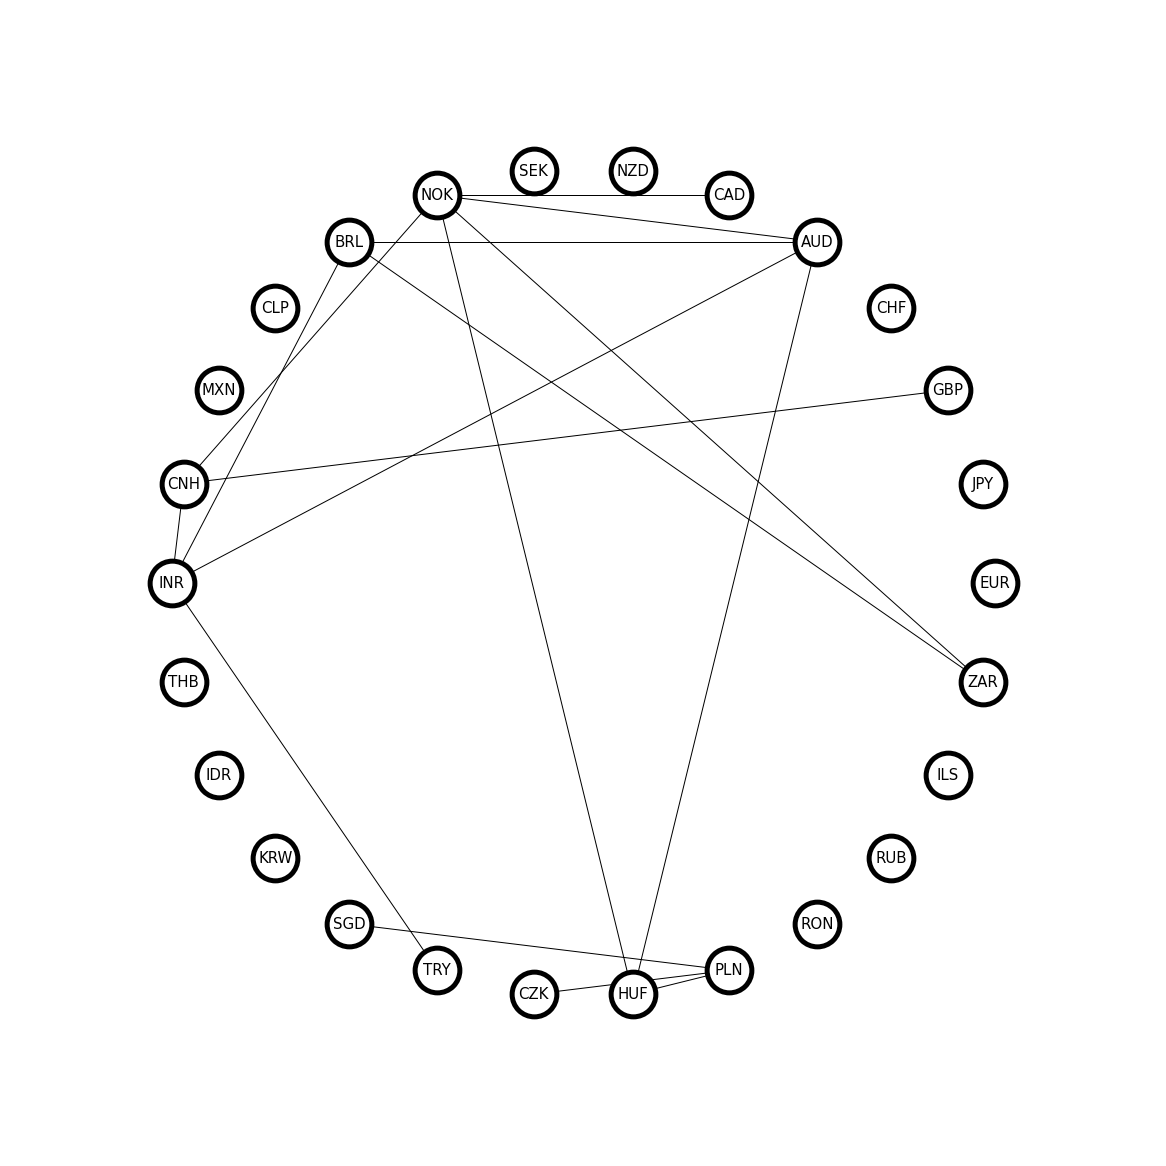

In [34]:
options = {
    "font_size": 15,
    "node_size": 2000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 1,
    "with_labels": True
    
}
plt.figure(figsize=(16,16))
nx.draw(USD_selected_assets, pos=nx.circular_layout(USD_selected_assets), **options)
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

forex_universe = []
for comp in nx.connected_components(USD_selected_assets):
    if len(comp) > 1:
        forex_universe.append(comp)

Not bad. We can further do either Box-Tiao or greedy search/SDP on this smaller currency universe.

## Greedy Search

First let's double check our smaller investing universe from the sparse estimates.

In [35]:
swap_universe

[{'4Yr', '5Yr', '6Yr', '7Yr', '8Yr', '9Yr'}, {'16Yr', '18Yr', '25Yr', '30Yr'}]

In [36]:
forex_universe

[{'AUD',
  'BRL',
  'CAD',
  'CNH',
  'CZK',
  'GBP',
  'HUF',
  'INR',
  'NOK',
  'PLN',
  'SGD',
  'TRY',
  'ZAR'}]

I'll try forex universe for this function.

Greedy algorithm is recommended as it's more stable than semidefinite relaxation.

In [37]:
selected_ccy = list(forex_universe[0])
USD_new_df = USD_test[selected_ccy]
USD_new_df.head()

,NOK,AUD,TRY,CZK,GBP,ZAR,SGD,CAD,INR,BRL,CNH,HUF,PLN
Dates,,,,,,,,,,,,,
2015-01-01,7.45200,0.81828,2.33138,22.88595,1.55856,11.54804,1.32351,1.16106,63.35500,2.65818,6.21900,261.460,3.54160
2015-01-02,7.59098,0.80893,2.34495,23.05705,1.53276,11.68320,1.33129,1.17849,63.29500,2.69410,6.22848,264.810,3.58623
2015-01-05,7.63808,0.80832,2.33056,23.20675,1.52498,11.70768,1.33533,1.17630,63.41875,2.70568,6.22794,266.393,3.59485
2015-01-06,7.74670,0.80839,2.32251,23.26683,1.51514,11.71350,1.33330,1.18361,63.57250,2.70055,6.21220,268.883,3.63188
2015-01-07,7.70469,0.80787,2.31947,23.53110,1.51104,11.68082,1.33972,1.18148,63.17500,2.68270,6.21576,268.470,3.62664


In [38]:
USD_new_portf = SmallMeanRevPortfolio(USD_new_df)

We'll re-calculate the least-square estimate of VAR(1) matrix and the full covariance matrix on this subset.

Try demeaned data first. If it doesn't work, try standardized.

In [39]:
full_VAR_est = USD_new_portf.least_square_VAR_fit(use_standardized=True)

C:\Anaconda3\envs\arbitragelab\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)


In [40]:
full_cov_est = USD_new_portf.standardized.cov().to_numpy()

Let's say we want to select 4 currenies to trade.

In [41]:
greedy_weights = USD_test_portf.greedy_search(4, full_VAR_est.T @ full_cov_est @ full_VAR_est, full_cov_est)

Convert this into a more readable format.

In [42]:
greedy_weights

array([[ 0.392668 ],
       [ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [-0.4998308],
       [ 0.       ],
       [ 0.       ],
       [-0.1957659],
       [ 0.       ],
       [ 0.       ],
       [-0.7467642],
       [ 0.       ],
       [ 0.       ]])

In [43]:
greedy_allocation = pd.DataFrame(greedy_weights)
greedy_allocation.index = USD_new_df.columns
greedy_allocation[greedy_allocation[0] != 0]

,0
NOK,0.392668
GBP,-0.499831
CAD,-0.195766
CNH,-0.746764


Due to the arbitrariness of the greedy algorithm, we can actually shuffle the sequence of the currencies input to get a few more combinations.

Let's see how the resulting portfolio looks like.

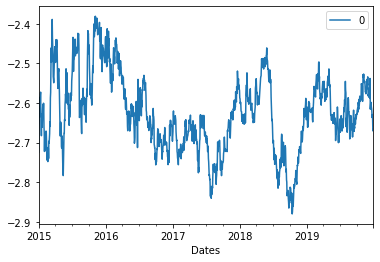

In [44]:
greedy_portf = USD_new_df @ greedy_weights
greedy_portf.plot()

In [45]:
coeff, hl = USD_new_portf.mean_rev_coeff(greedy_weights.reshape(-1,), USD_new_df, interval='D')
print("Mean-rev Coefficient: {}; half-life: {}".format(coeff, hl*252))

Mean-rev Coefficient: 6.578638671802429; half-life: 26.551555453227063


Not bad for a currency trade.

Tested both standardized and demeaned data. Both works for greedy search.

## Semidefinite Relaxation

For semidefinite relaxation, however, things are not working smoothly for demeaned data. The optimizer failed to give a result for Forex data. Therefore, I had to use standardized data.

In [46]:
full_VAR_est = USD_new_portf.least_square_VAR_fit(use_standardized=True)

C:\Anaconda3\envs\arbitragelab\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)


In [47]:
full_cov_est = USD_new_portf.standardized.cov().to_numpy()

In [48]:
sdp_weights = USD_new_portf.sdp_relax(4, full_VAR_est.T @ full_cov_est @ full_VAR_est, full_cov_est, threshold=5)

5.998916801733923


In [49]:
sdp_weights

array([ 0.07361, -0.     ,  0.     ,  0.60338, -0.26611,  0.12745,
       -0.     , -0.     ,  0.08287, -0.     , -0.12477, -0.     ,
       -0.72182])

In a more readable format:

In [50]:
sdp_allocation = pd.DataFrame(sdp_weights)
sdp_allocation.index = USD_new_df.columns
sdp_allocation[sdp_allocation[0] != 0]

,0
NOK,0.07361
CZK,0.60338
GBP,-0.26611
ZAR,0.12745
INR,0.08287
CNH,-0.12477
PLN,-0.72182


Although SDP approach was able to reduce the cardinality, the optimized weight rarely has the cardinality desired.

Of course we can cut off the weights with the least absolute value, but I'll keep the solution as is and leave it to users' discretion.

Anyway, first we'll try the solution as-is, and then we'll cut off the weights with the least absolute value so as to match the cardinality desired.


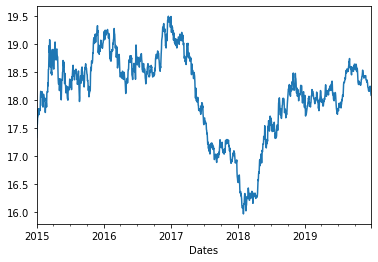

In [51]:
sdp_portf = USD_new_df @ sdp_weights
sdp_portf.plot()

In [52]:
coeff, hl = USD_new_portf.mean_rev_coeff(sdp_weights, USD_new_df, interval='D')
print("Mean-rev Coefficient: {}; half-life: {}".format(coeff, hl*252))

Mean-rev Coefficient: 1.5068408478285837; half-life: 115.92006531599998


This is not as good as the greedy search result. And we're trading 7 assets instead of 4.

Now cut off the two least weighted assets to make it 4.

In [53]:
sdp_allocation.loc['INR'] = 0
sdp_allocation.loc['NOK'] = 0
sdp_allocation.loc['CNH'] = 0

In [54]:
sdp_allocation.values

array([[ 0.     ],
       [-0.     ],
       [ 0.     ],
       [ 0.60338],
       [-0.26611],
       [ 0.12745],
       [-0.     ],
       [-0.     ],
       [ 0.     ],
       [-0.     ],
       [ 0.     ],
       [-0.     ],
       [-0.72182]])

In [55]:
coeff, hl = USD_new_portf.mean_rev_coeff(sdp_allocation.values.reshape(-1,), USD_new_df, interval='D')
print("Mean-rev Coefficient: {}; half-life: {}".format(coeff, hl*252))

Mean-rev Coefficient: 1.292865474118716; half-life: 135.10538644414837


I will not plot the data again as the half-life has become worse (took longer to mean-revert).

One possible solution is to try a smaller cardinality.

In [56]:
sdp_weights = USD_new_portf.sdp_relax(2.5, full_VAR_est.T @ full_cov_est @ full_VAR_est, full_cov_est, threshold=5)
sdp_weights

3.7286540760508062


array([ 0.2125 ,  0.     ,  0.     ,  0.     , -0.55965,  0.     ,
       -0.     , -0.00801, -0.     ,  0.     , -0.80098, -0.     ,
       -0.     ])

In [57]:
sdp_allocation = pd.DataFrame(sdp_weights)
sdp_allocation.index = USD_new_df.columns
sdp_allocation[sdp_allocation[0] != 0]

,0
NOK,0.21250
GBP,-0.55965
CAD,-0.00801
CNH,-0.80098


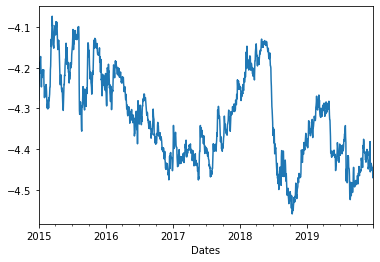

In [58]:
sdp_portf = USD_new_df @ sdp_weights
sdp_portf.plot()

In [59]:
coeff, hl = USD_new_portf.mean_rev_coeff(sdp_weights, USD_new_df, interval='D')
print("Mean-rev Coefficient: {}; half-life: {}".format(coeff, hl*252))

Mean-rev Coefficient: 2.7023356236513347; half-life: 64.63782217587462


When setting the cardinality to 2.5 (I know it doesn't make much sense, but the result matches the desired cardinality 4), the half-life looks much better.

Also, the currency selected matches the greedy algorithm. (CNH, NOK, GBP, CAD).

I don't know what I'll do at this point but it might be good to tune the cardinality as a real number parameter to make sure the SDP yield the desired cardinality.